In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq , os
from qiskit.providers.fake_provider import *
import numpy as np
emulator_aer_dm = Aer.get_backend('aer_simulator_density_matrix')

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2,
 qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2,
 qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2,
 qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke,
 qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2]

In [3]:
benchmarks = [
    (supermarq.bit_code.BitCode(3, 3, [1, 0, 1]), "bitcode3"),
    (supermarq.ghz.GHZ(3), "ghz3"),
    (supermarq.hamiltonian_simulation.HamiltonianSimulation(3), "hsim3"),
    (supermarq.mermin_bell.MerminBell(3), "marmin_bell_3"),
    (supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(3), "qaoa_swap_proxy3"),
    (supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(3), "qaoa_vanilla_proxy3"),]  

for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print(i[1],"\n")
    print(circuit.draw())

bitcode3 

              ┌───┐                                                    ┌─┐     »
         q_0: ┤ X ├──■─────────────────■────────────────────■──────────┤M├─────»
              └───┘┌─┴─┐┌───┐┌─┐     ┌─┴─┐┌───┐   ┌─┐     ┌─┴─┐┌───┐   └╥┘     »
         q_1: ─────┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├───┤M├─|0>─┤ X ├┤ X ├────╫──────»
                   └───┘└─┬─┘└╥┘     └───┘└─┬─┘   └╥┘     └───┘└─┬─┘    ║      »
         q_2: ──■─────────■───╫────────■────■──────╫────────■────■──────╫──────»
              ┌─┴─┐┌───┐ ┌─┐  ║      ┌─┴─┐┌───┐┌─┐ ║      ┌─┴─┐┌───┐┌─┐ ║      »
         q_3: ┤ X ├┤ X ├─┤M├──╫──|0>─┤ X ├┤ X ├┤M├─╫──|0>─┤ X ├┤ X ├┤M├─╫──|0>─»
              ├───┤└─┬─┘ └╥┘  ║      └───┘└─┬─┘└╥┘ ║      └───┘└─┬─┘└╥┘ ║  ┌─┐ »
         q_4: ┤ X ├──■────╫───╫─────────────■───╫──╫─────────────■───╫──╫──┤M├─»
              └───┘       ║   ║                 ║  ║                 ║  ║  └╥┘ »
    m_mcm0: 2/════════════╩═══╩═════════════════╬══╬═════════════════╬══╬═══╬══»
                 

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0], 'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'hsim3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'marmin_bell_3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'qaoa_swap_proxy3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_vanilla_proxy3': [1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]}


In [5]:
jobs =[]
for backend in selected_fakes:
    fake=backend
    print("-----------------", backend)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = fake().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(label,score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,fake,job,score))
#jobs

----------------- <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'>
bitcode3 0.0
ghz3 0.8813998183469198
hsim3 0.951446609406726
marmin_bell_3 0.4755
qaoa_swap_proxy3 0.3439999904512673
qaoa_vanilla_proxy3 0.8800000139087019
----------------- <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'>
bitcode3 0.0
ghz3 0.9018658337022224
hsim3 0.9447799427400593
marmin_bell_3 0.4885
qaoa_swap_proxy3 0.3639999916754636
qaoa_vanilla_proxy3 0.9100000150067573
----------------- <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'>
bitcode3 0.0
ghz3 0.8488292554394024
hsim3 0.9341132760733926
marmin_bell_3 0.4945
qaoa_swap_proxy3 0.34399999045126706
qaoa_vanilla_proxy3 0.892000014347924
----------------- <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'>
bitcode3 0.0
ghz3 0.921995661584792
hsim3 0.9704466094067259
marmin_bell_3 0.494
qaoa_swap_proxy3 0.32999998

In [6]:
def cut(j):
    l= str(j)
    import re; parts = l.split(".")
    j=parts[5]
    return j

all_scores={}   
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(cut(fakes))
    all_scores[device_scores]= i
print(all_scores)

{'device_score_fake_burlington': {'bitcode3': 0.0, 'ghz3': 0.8813998183469198, 'hsim3': 0.951446609406726, 'marmin_bell_3': 0.4755, 'qaoa_swap_proxy3': 0.3439999904512673, 'qaoa_vanilla_proxy3': 0.8800000139087019}, 'device_score_fake_bogota': {'bitcode3': 0.0, 'ghz3': 0.9018658337022224, 'hsim3': 0.9447799427400593, 'marmin_bell_3': 0.4885, 'qaoa_swap_proxy3': 0.3639999916754636, 'qaoa_vanilla_proxy3': 0.9100000150067573}, 'device_score_fake_essex': {'bitcode3': 0.0, 'ghz3': 0.8488292554394024, 'hsim3': 0.9341132760733926, 'marmin_bell_3': 0.4945, 'qaoa_swap_proxy3': 0.34399999045126706, 'qaoa_vanilla_proxy3': 0.892000014347924}, 'device_score_fake_sherbrooke': {'bitcode3': 0.0, 'ghz3': 0.921995661584792, 'hsim3': 0.9704466094067259, 'marmin_bell_3': 0.494, 'qaoa_swap_proxy3': 0.3299999895943295, 'qaoa_vanilla_proxy3': 0.9540000166172384}, 'device_score_fake_belem': {'bitcode3': 0.0, 'ghz3': 0.9088280752936142, 'hsim3': 0.9407799427400593, 'marmin_bell_3': 0.4935, 'qaoa_swap_proxy3': 

USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.0


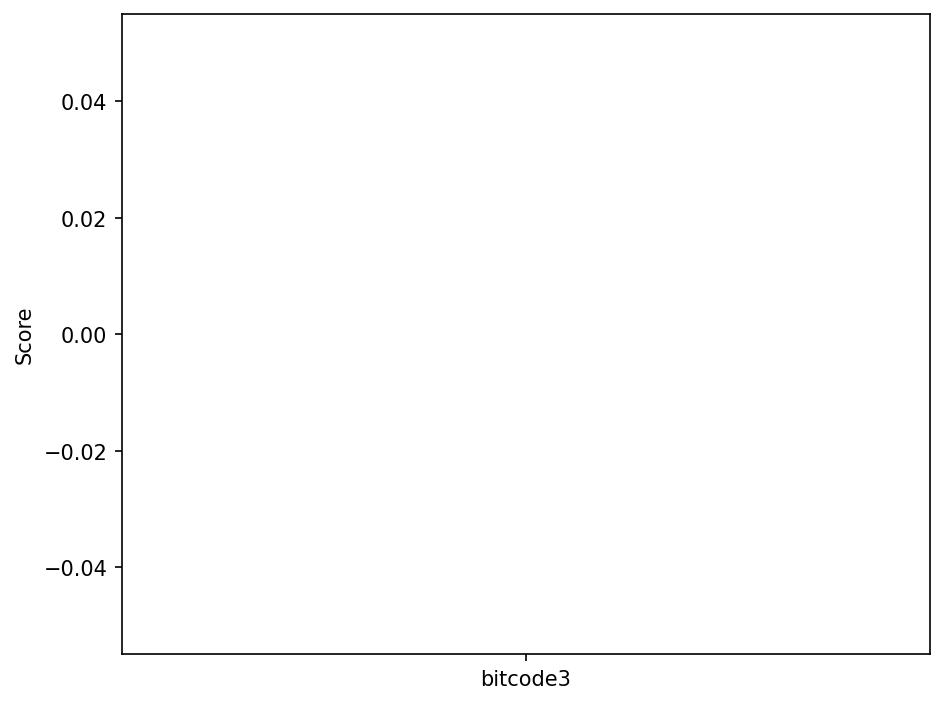

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'> CIRCUIT_NAME: ghz3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.8813998183469198


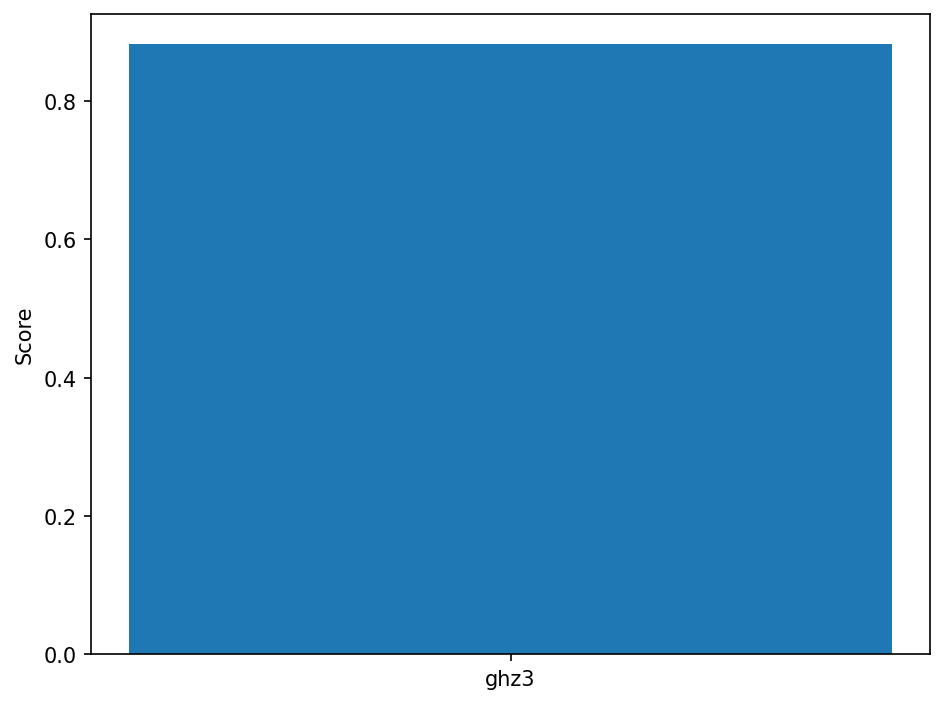

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'> CIRCUIT_NAME: hsim3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.951446609406726


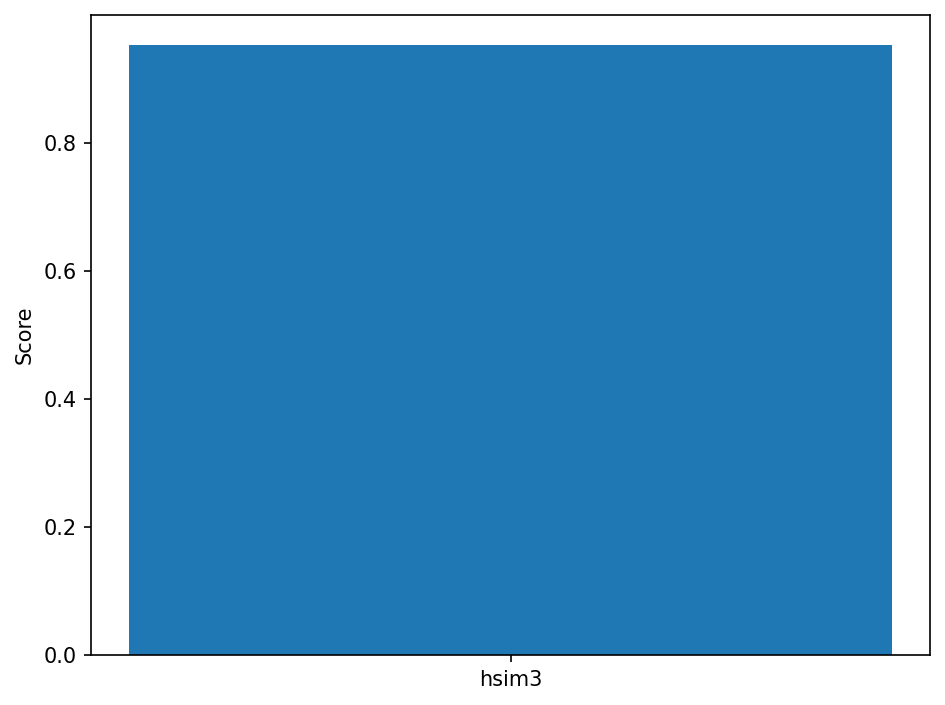

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.4755


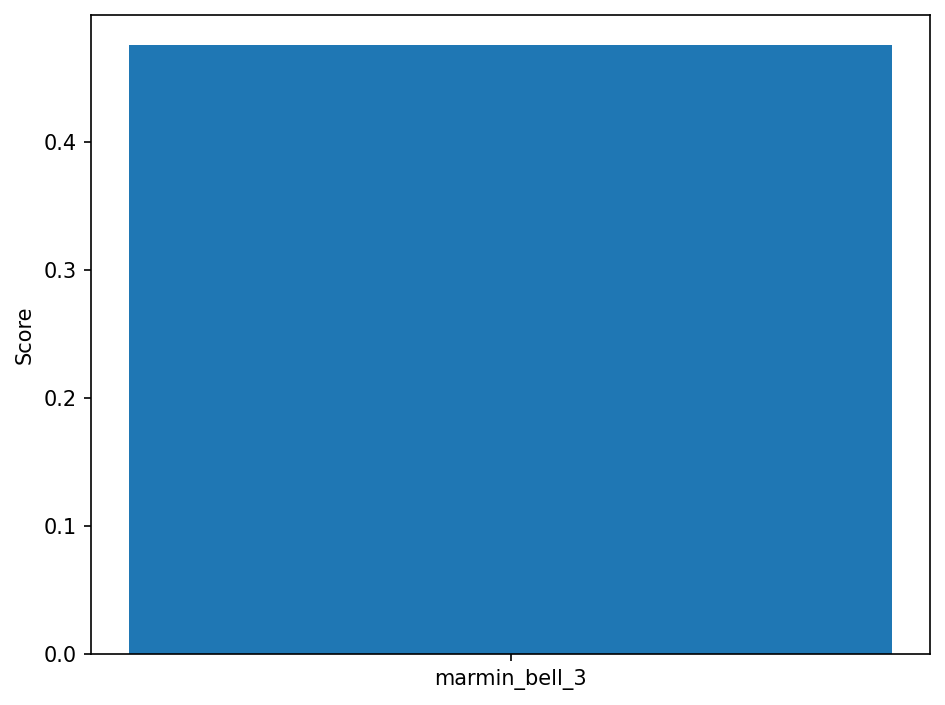

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.3439999904512673


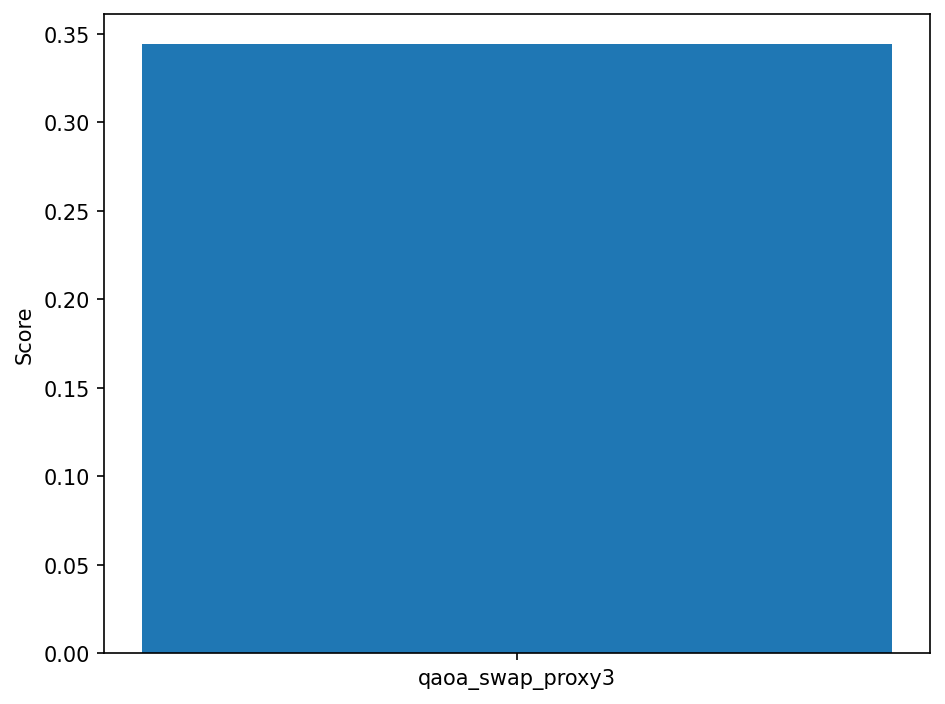

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.burlington.fake_burlington.FakeBurlingtonV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.8800000139087019


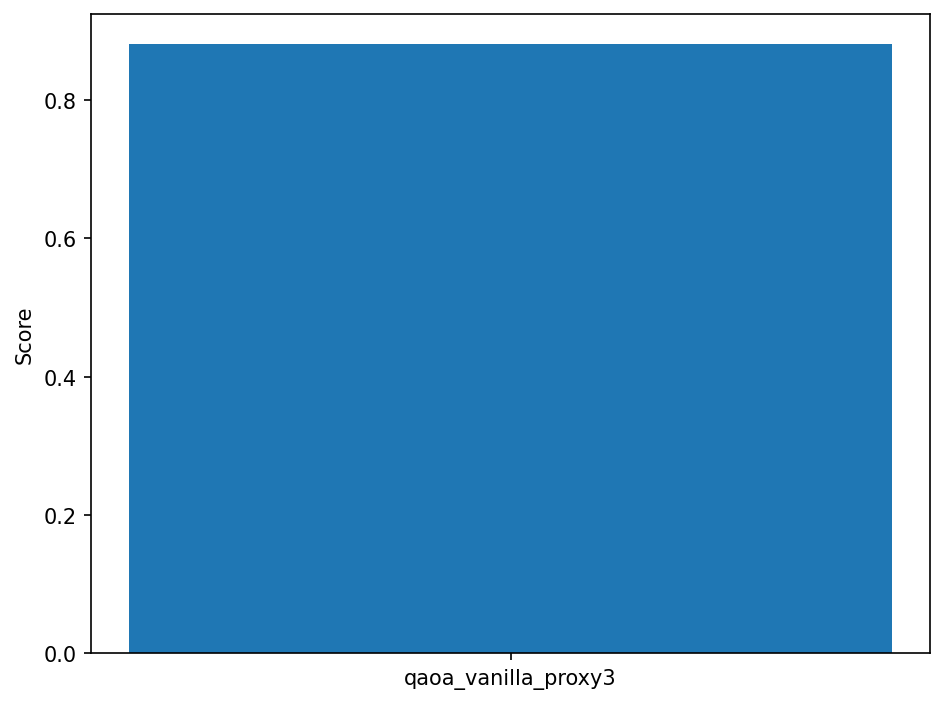

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.0


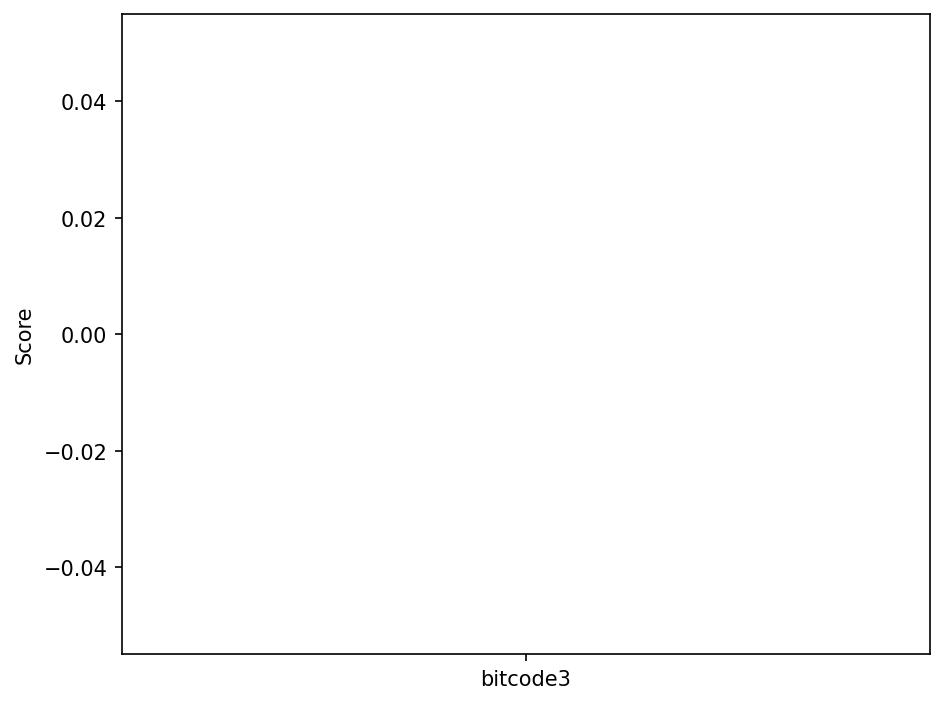

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: ghz3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9018658337022224


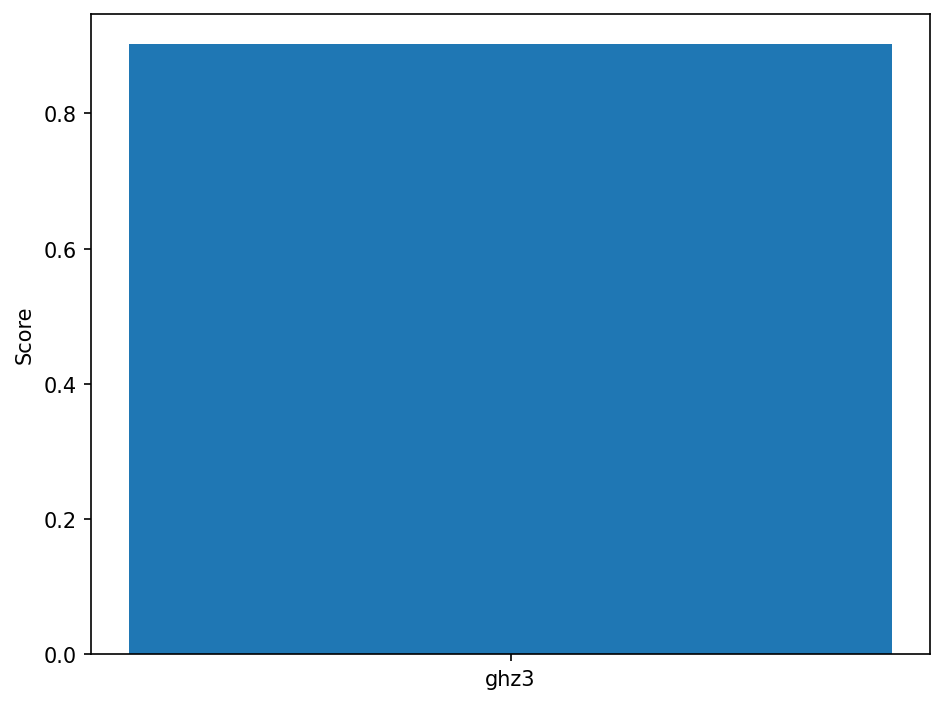

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: hsim3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9447799427400593


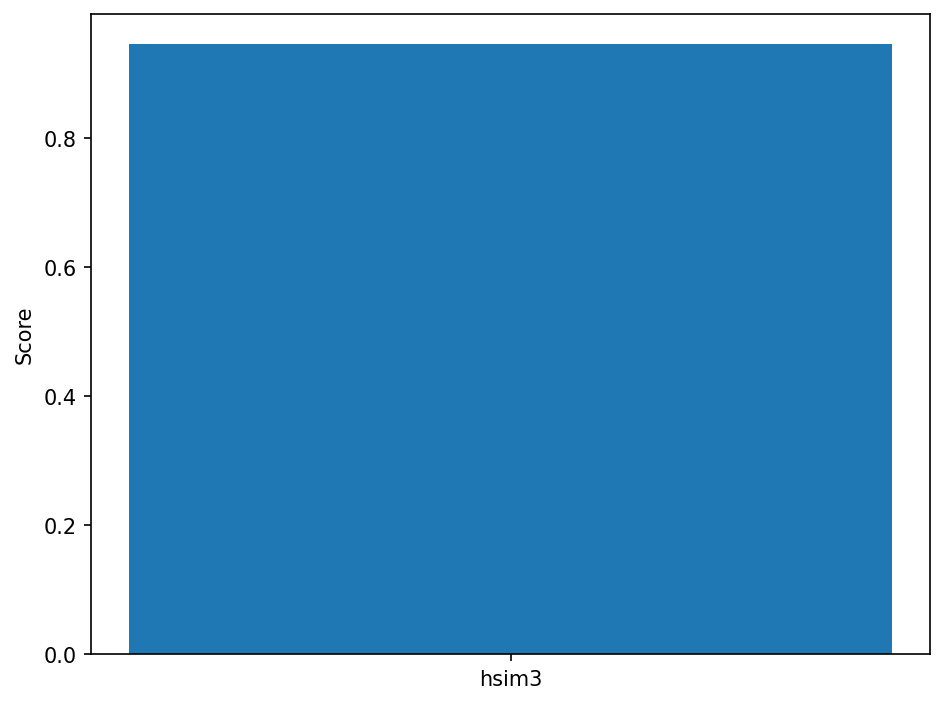

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.4885


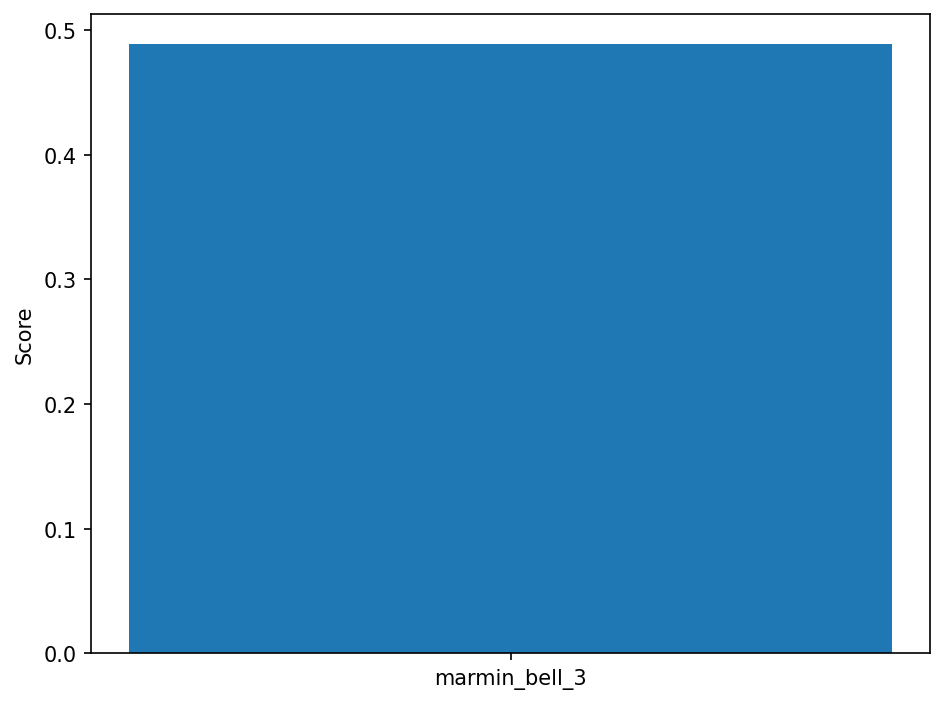

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.3639999916754636


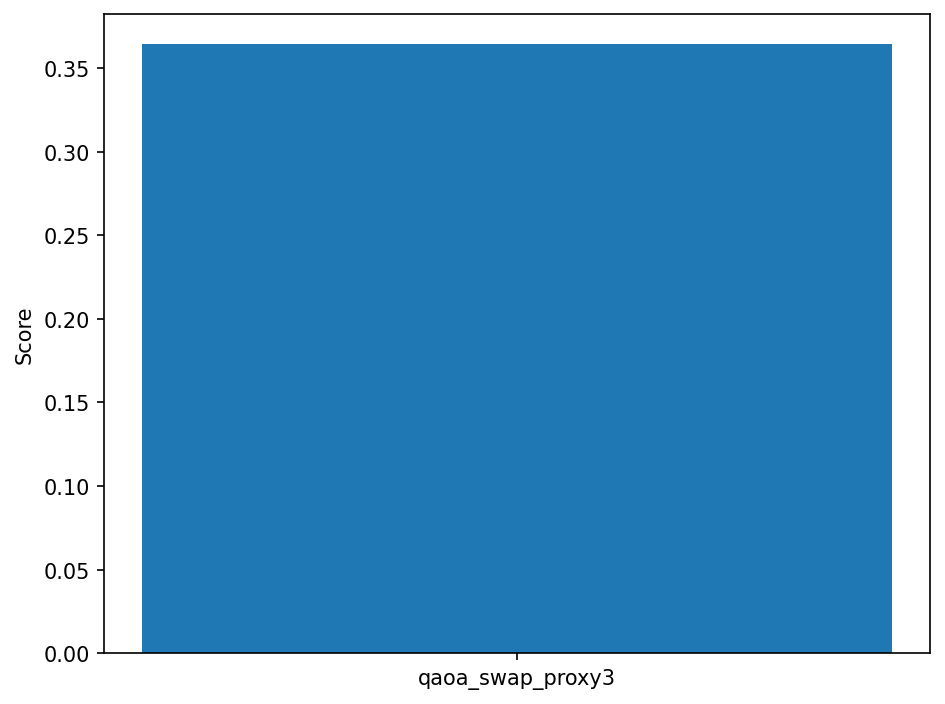

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9100000150067573


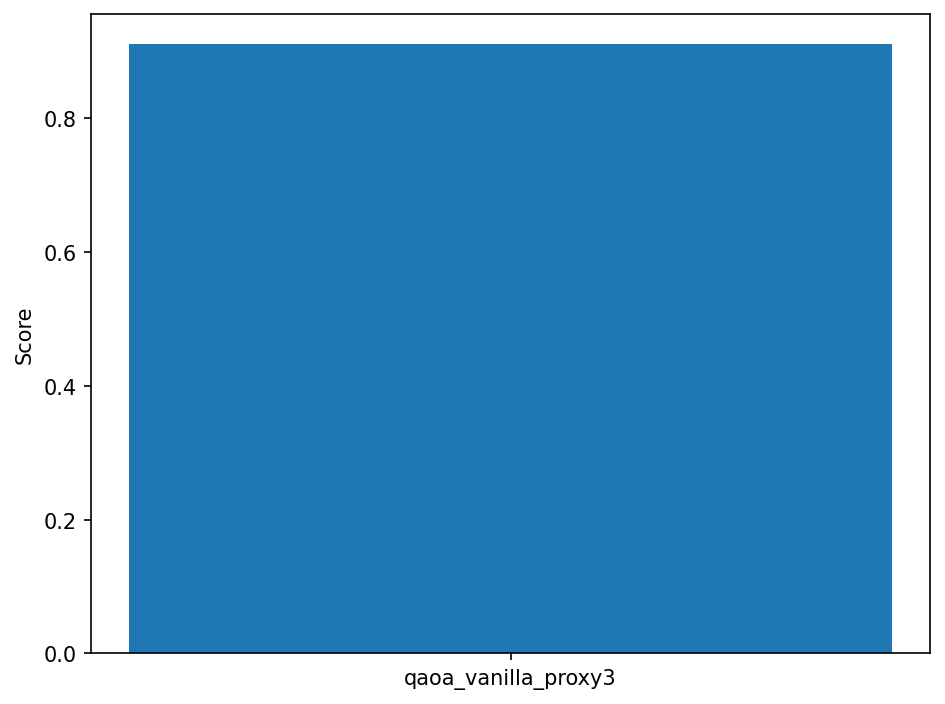

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.0


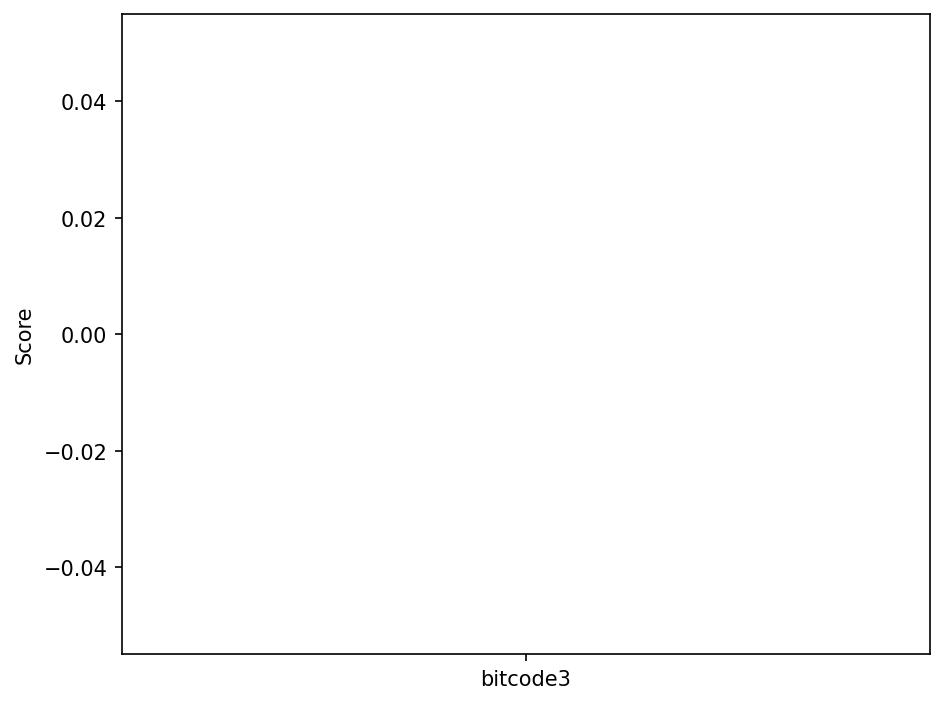

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'> CIRCUIT_NAME: ghz3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.8488292554394024


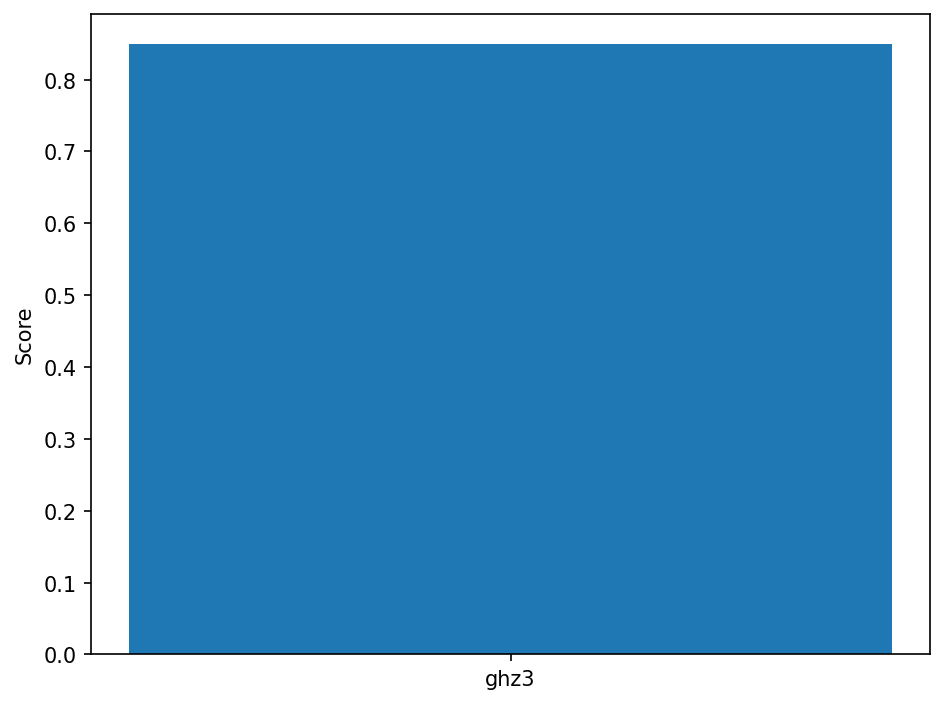

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'> CIRCUIT_NAME: hsim3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9341132760733926


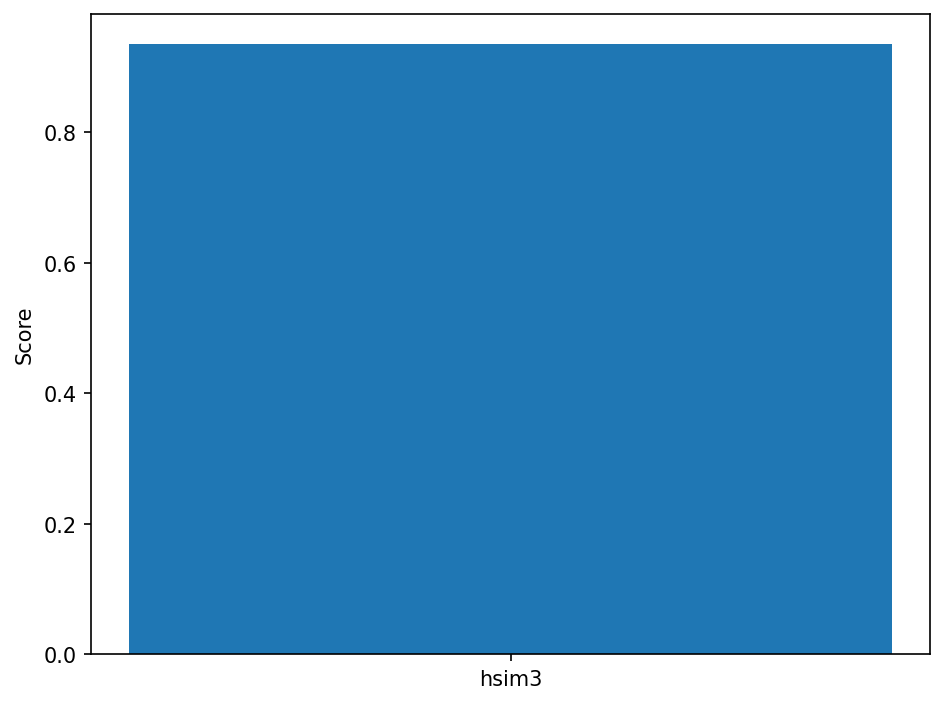

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.4945


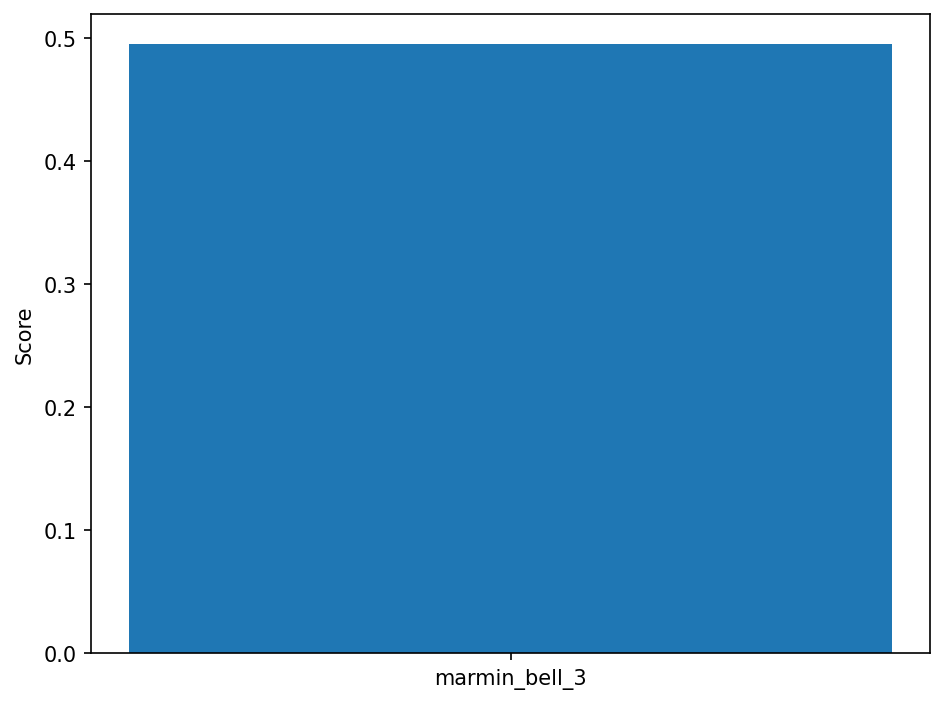

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.34399999045126706


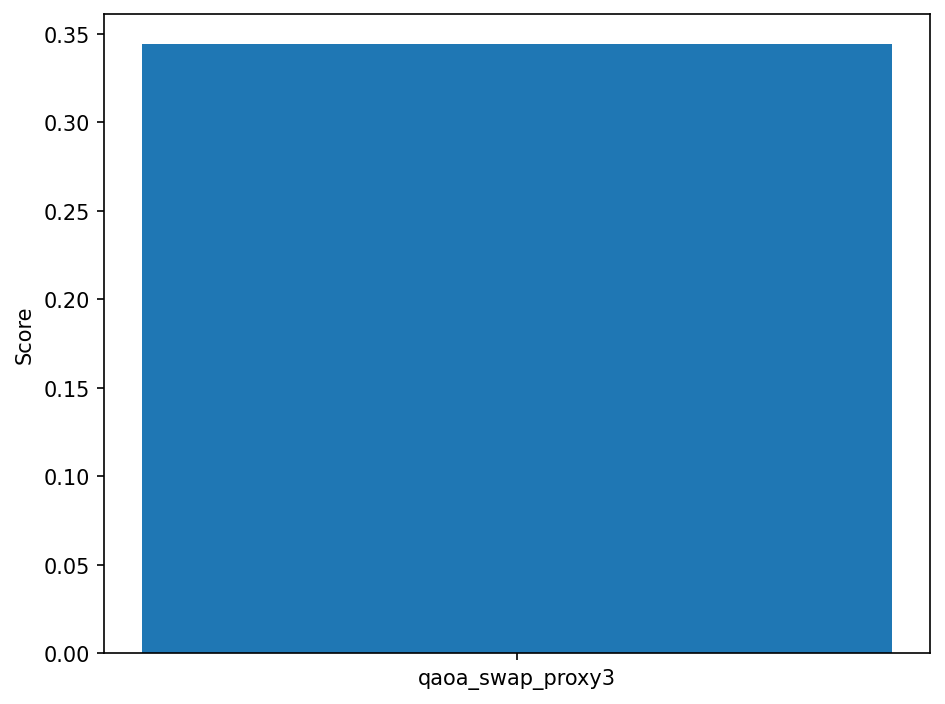

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.892000014347924


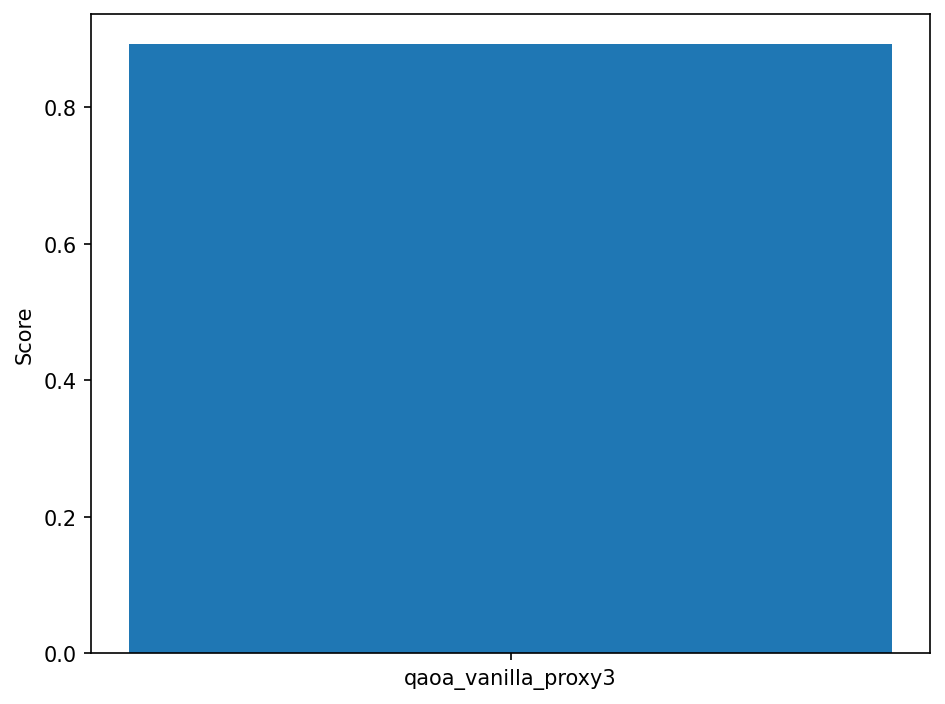

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'> CIRCUIT_NAME: bitcode3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.0


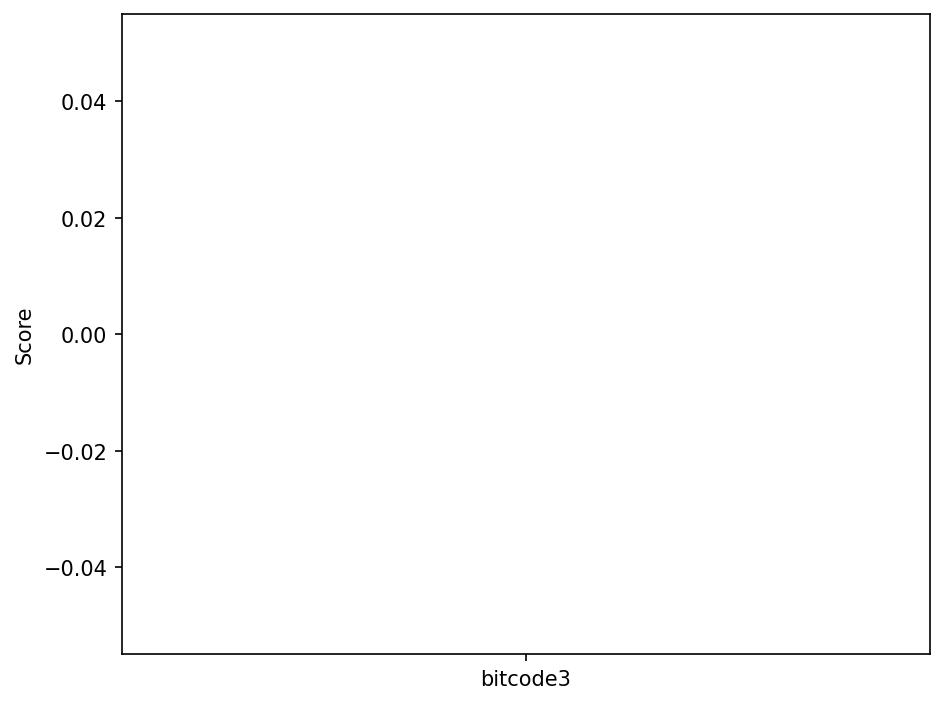

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'> CIRCUIT_NAME: ghz3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.921995661584792


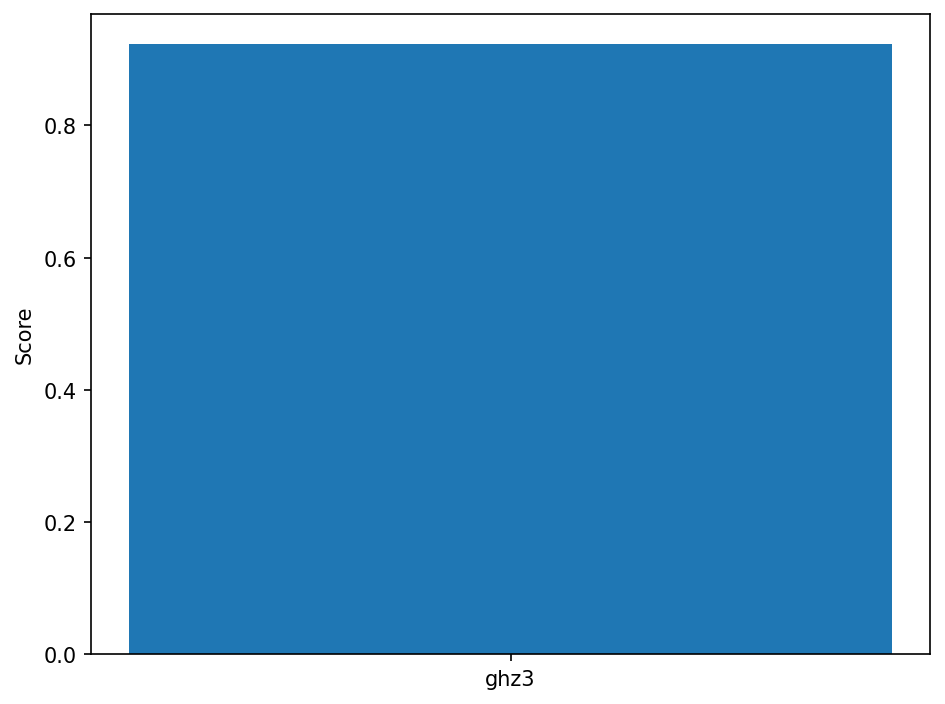

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'> CIRCUIT_NAME: hsim3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9704466094067259


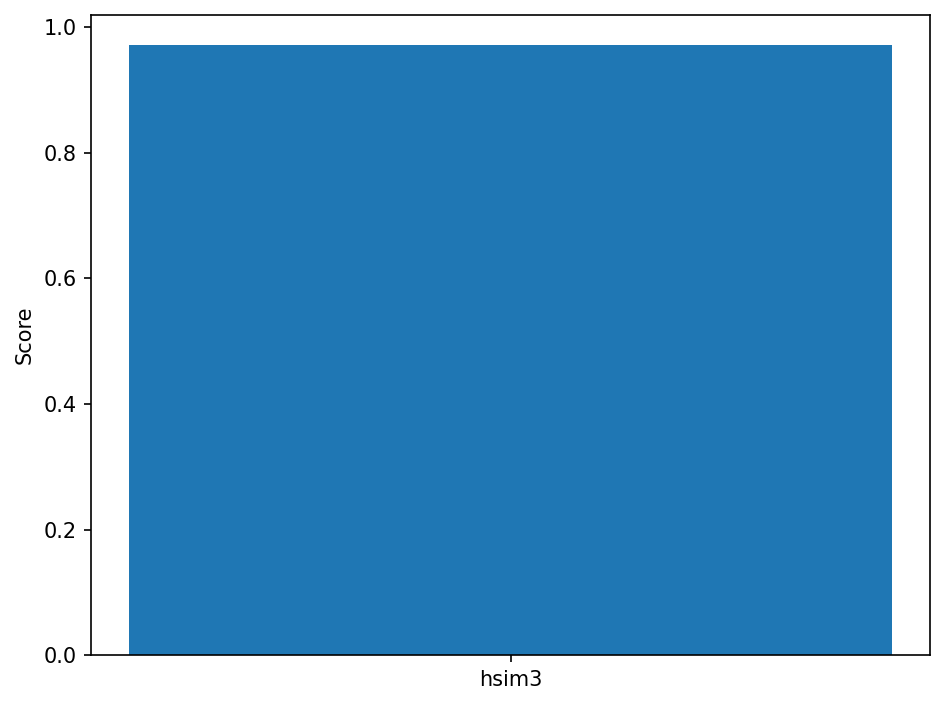

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.494


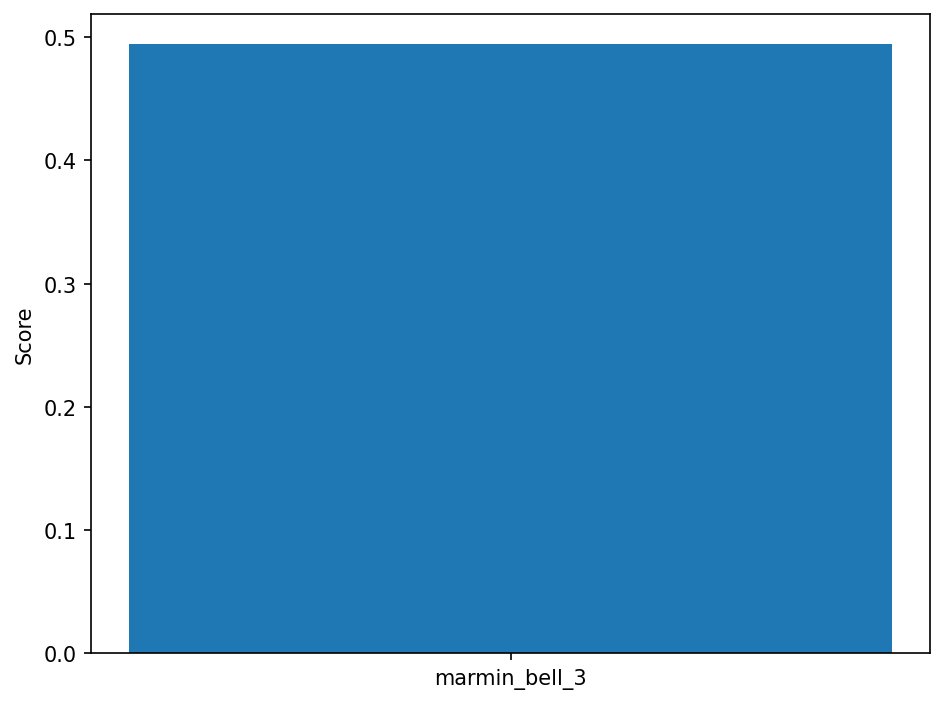

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.3299999895943295


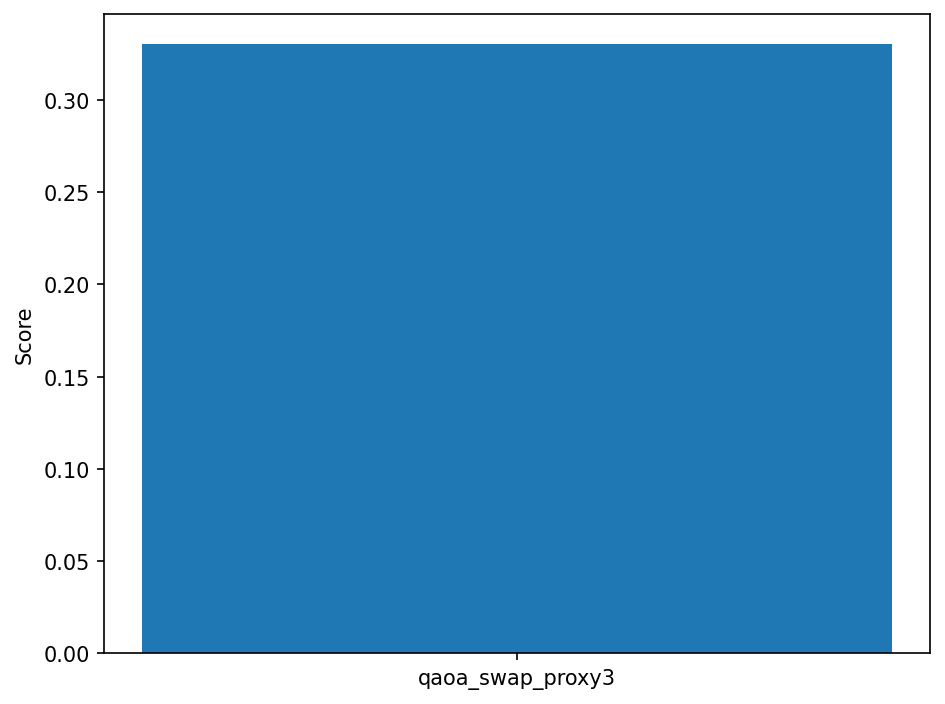

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.sherbrooke.fake_sherbrooke.FakeSherbrooke'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9540000166172384


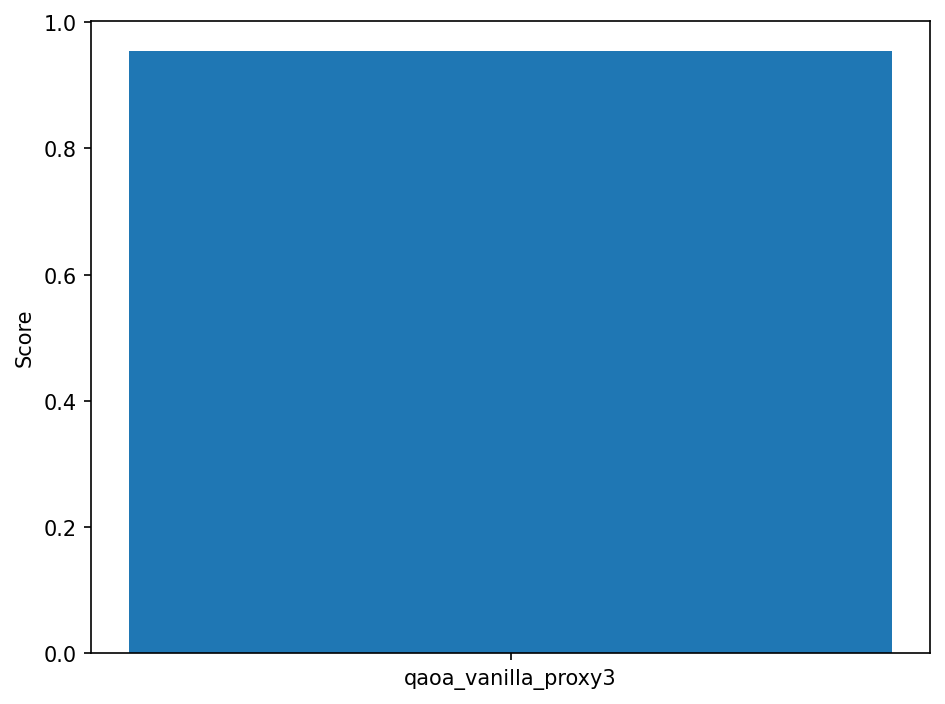

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2'> CIRCUIT_NAME: bitcode3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.0


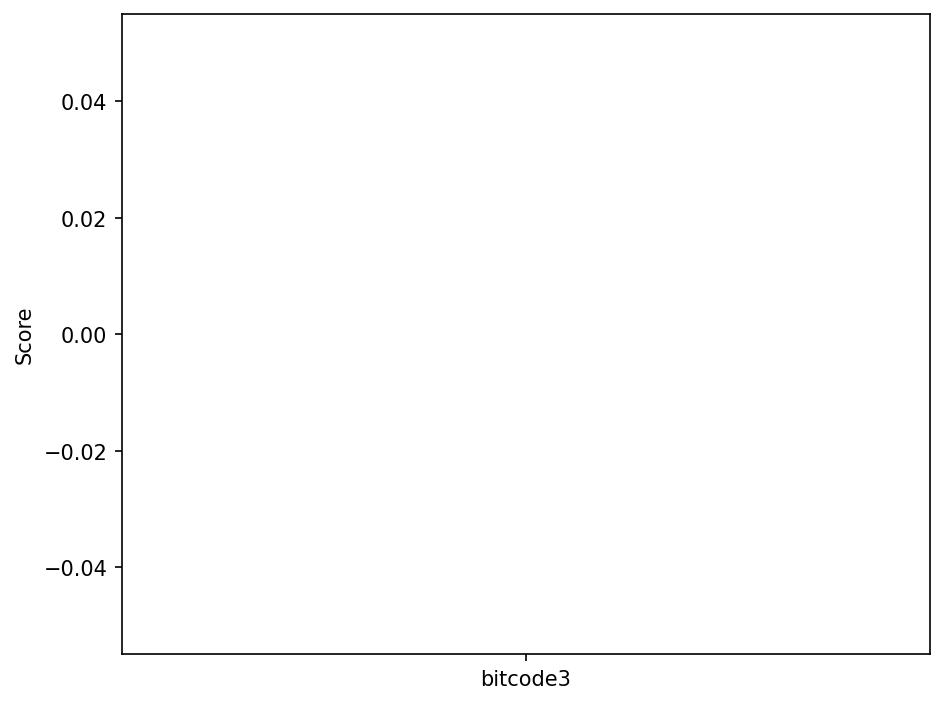

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2'> CIRCUIT_NAME: ghz3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9088280752936142


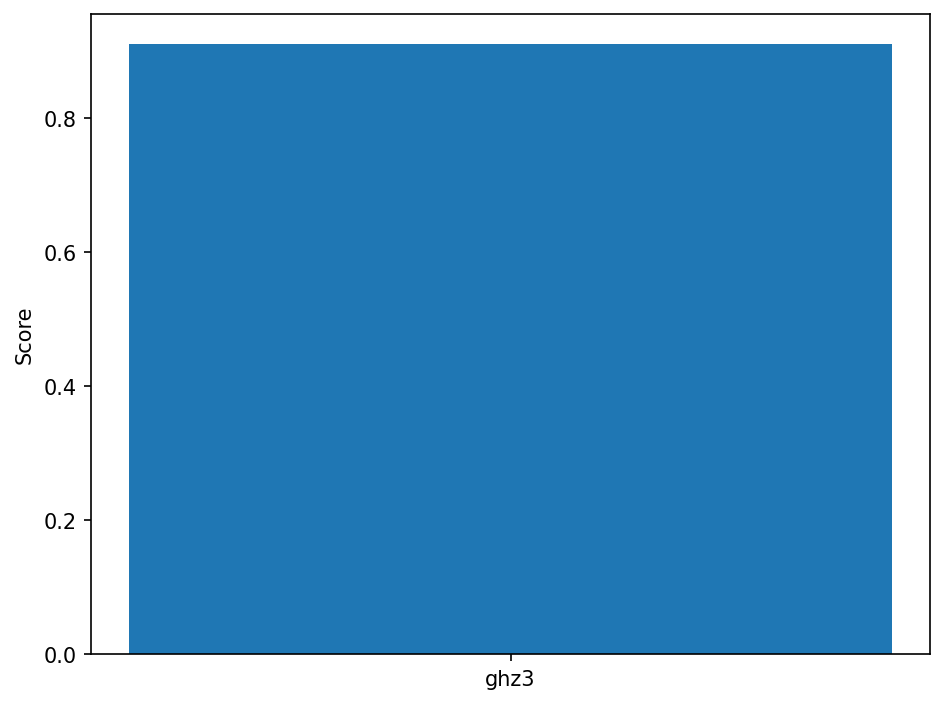

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2'> CIRCUIT_NAME: hsim3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9407799427400593


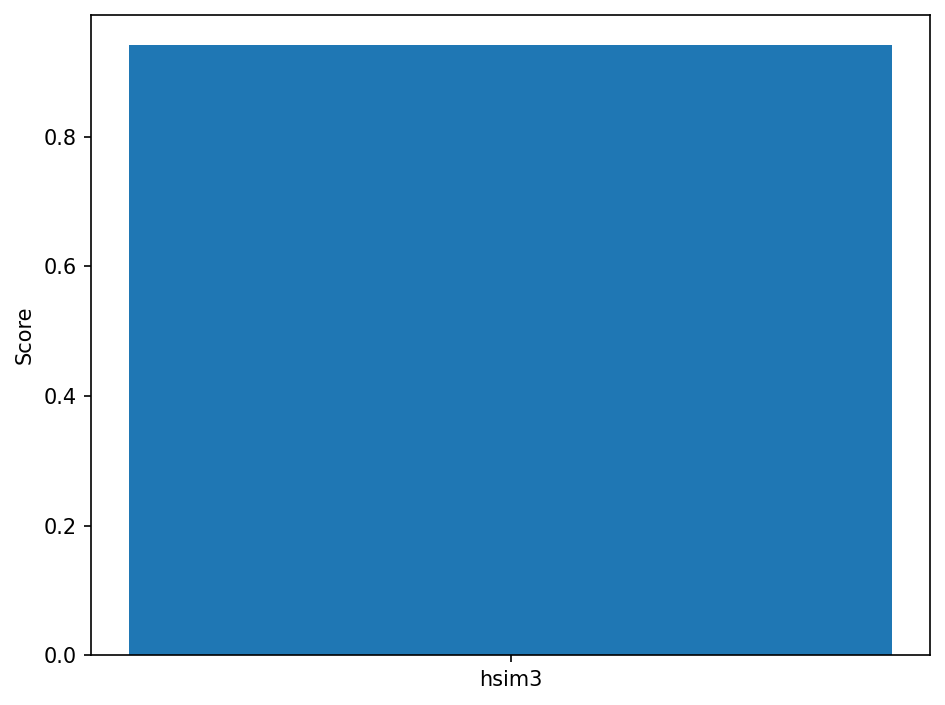

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2'> CIRCUIT_NAME: marmin_bell_3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.4935


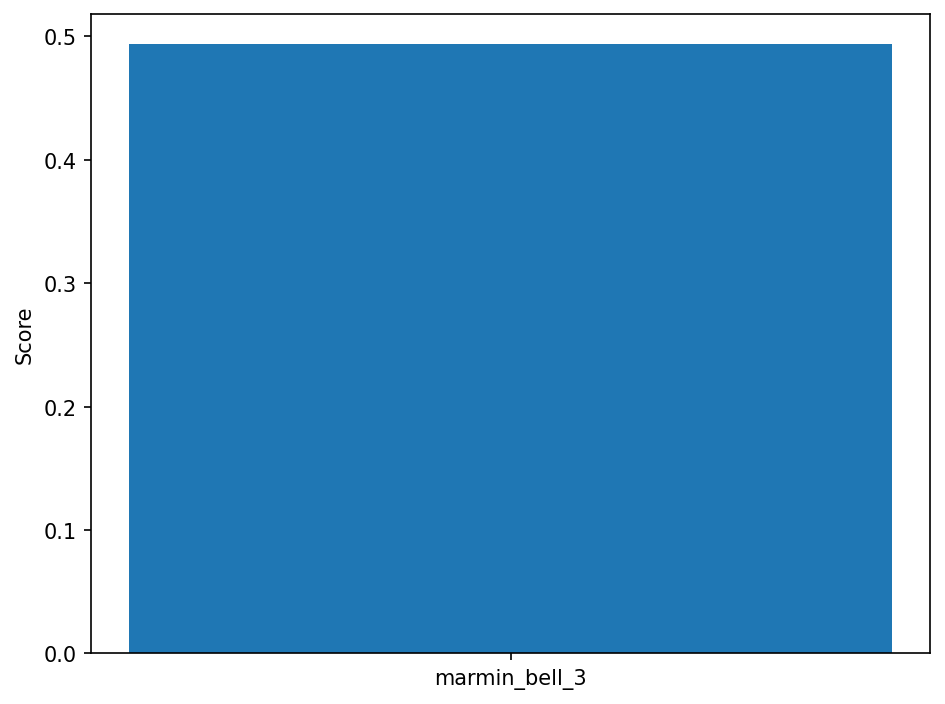

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2'> CIRCUIT_NAME: qaoa_swap_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.38399999289966014


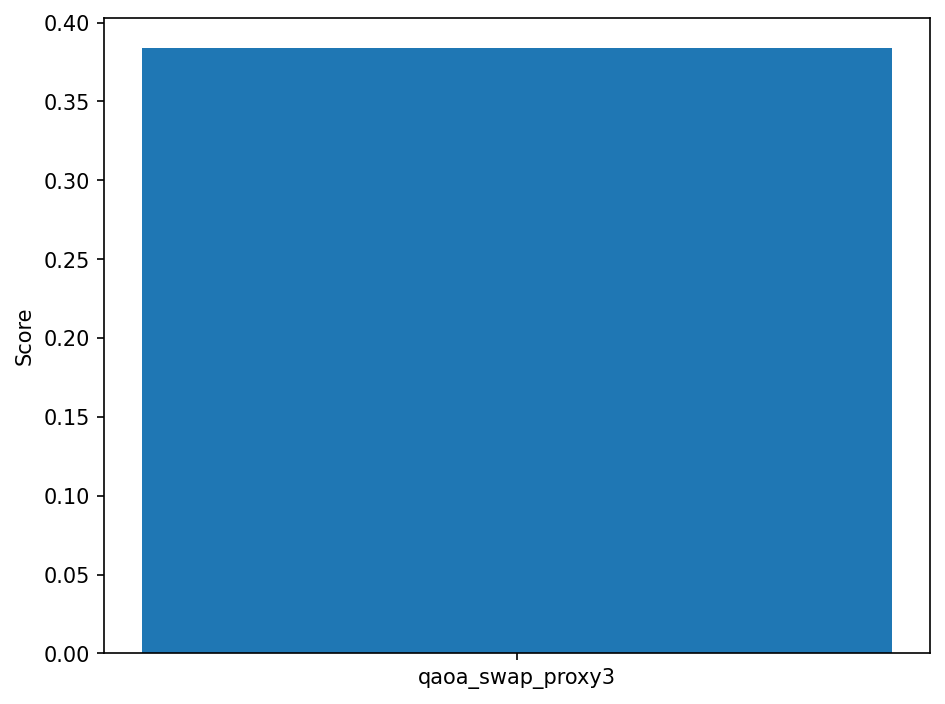

-----------------------------------------------------------
USED BACKEND:: <class 'qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2'> CIRCUIT_NAME: qaoa_vanilla_proxy3 COUNTS : {'101': 15, '001': 183, '110': 176, '011': 145, '111': 133, '010': 23, '000': 163, '100': 162} ; SCORE = 0.9240000155191831


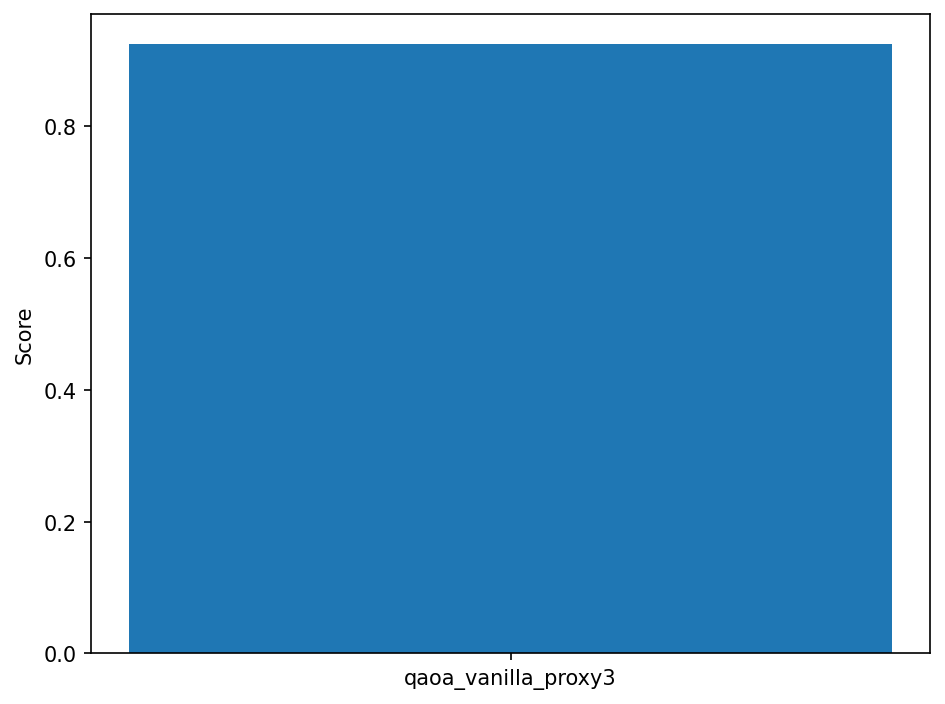

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score in jobs:
    print("USED BACKEND::",backend,"CIRCUIT_NAME:",label,"COUNTS :", counts, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

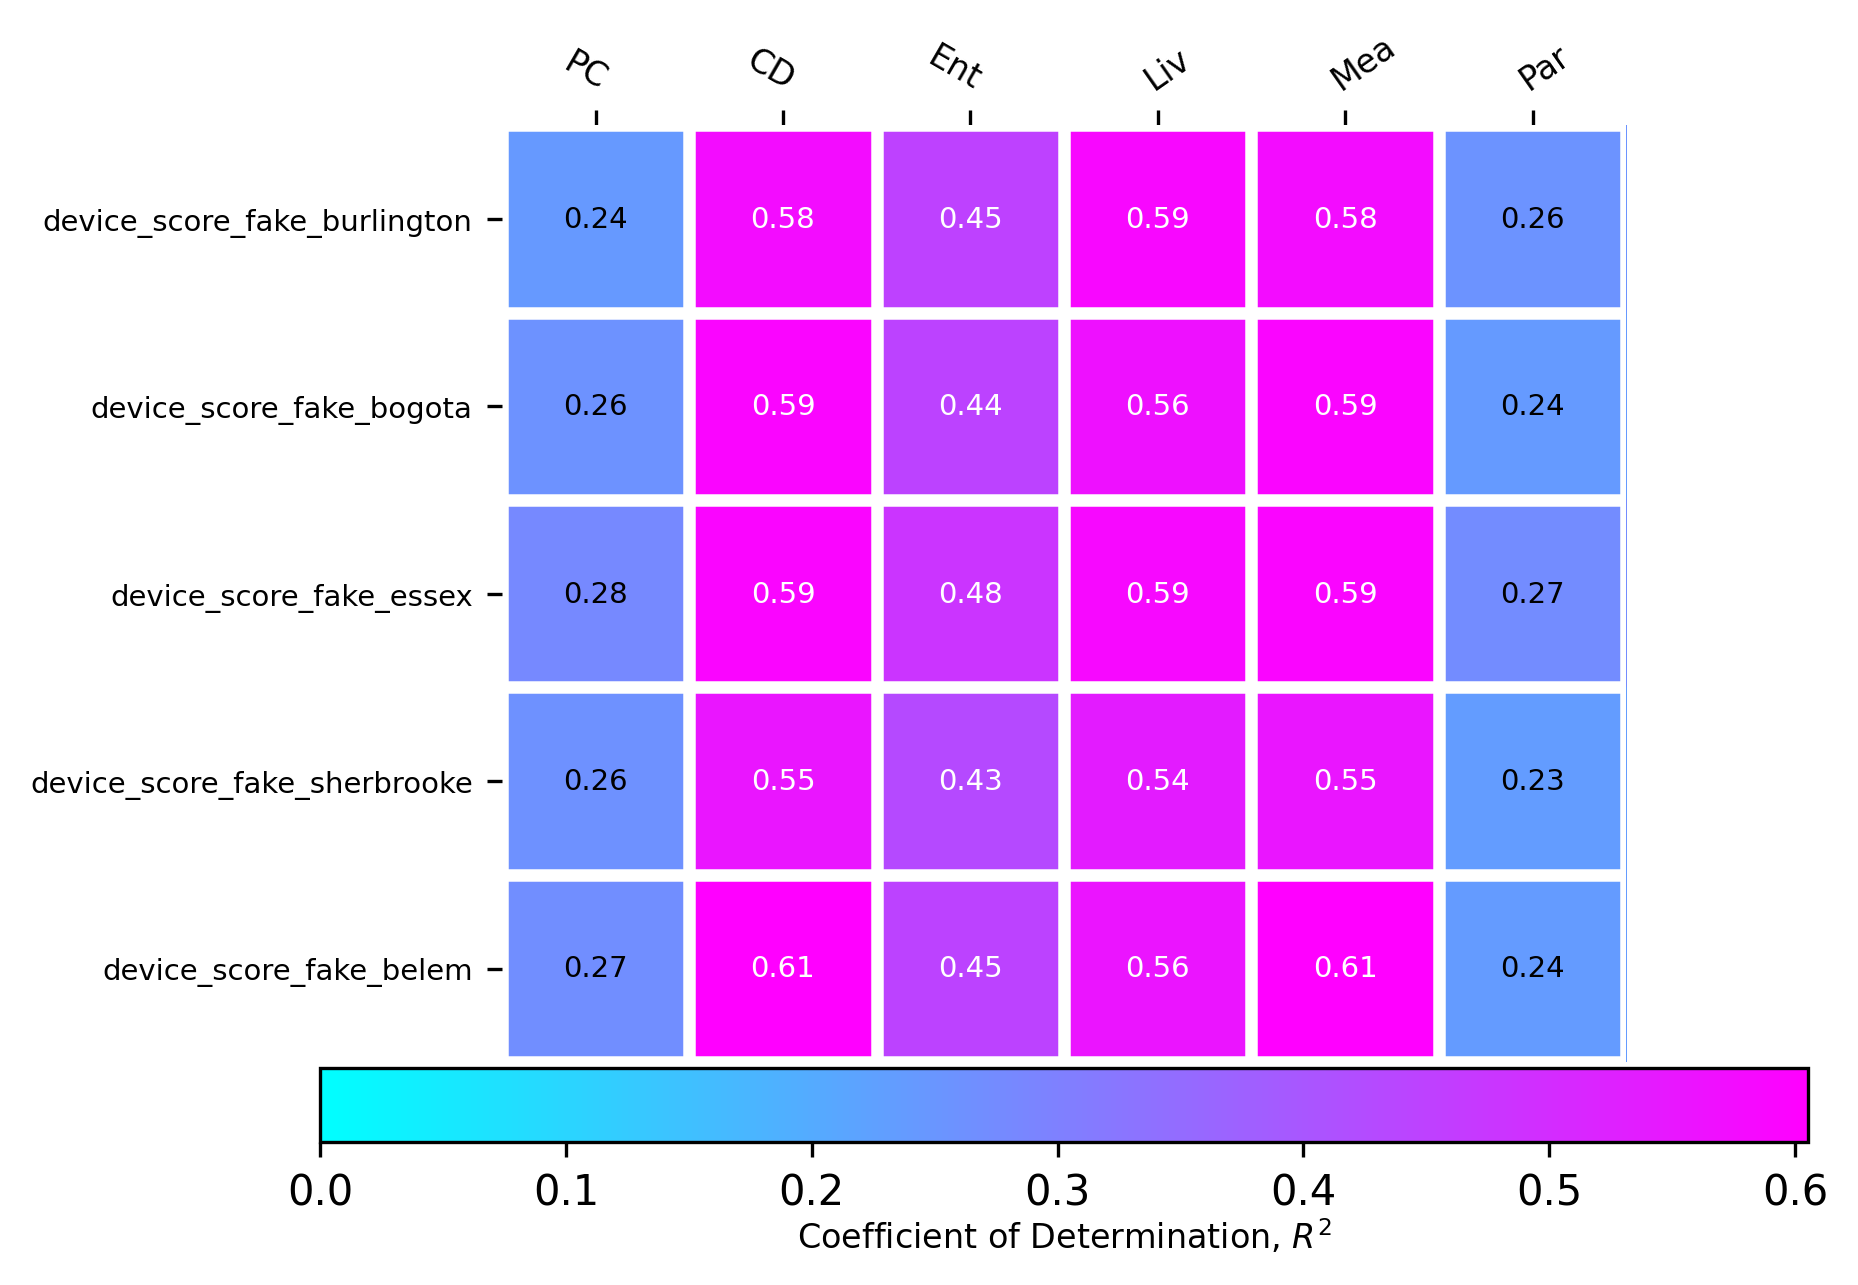

In [8]:
all_fake_names=[]
all_fake_scores=[]
for keys , values in all_scores.items():
    all_fake_scores.append(values)
    all_fake_names.append(keys)
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)
